In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os
%matplotlib inline

In [3]:
df = pd.DataFrame()
for f in os.listdir("../data"):
    if(f[-7:] != "emg.csv"): continue
    print(f)
    tdf = pd.read_csv(f"../data/{f}")
    tdf["Time"] = tdf.index * 0.001
    tdf["filename"] = f.replace(".csv", "")
    df = pd.concat([df, tdf])

20221022_162247_emg.csv
20221022_162125_emg.csv


In [4]:
df

,Emg_cnt,Time,filename
0,1732.0,0.000,20221022_162247_emg
1,1741.0,0.001,20221022_162247_emg
2,1743.0,0.002,20221022_162247_emg
3,1743.0,0.003,20221022_162247_emg
4,1741.0,0.004,20221022_162247_emg
...,...,...,...
59995,1729.0,59.995,20221022_162125_emg
59996,1728.0,59.996,20221022_162125_emg
59997,1726.0,59.997,20221022_162125_emg
59998,1721.0,59.998,20221022_162125_emg


In [5]:
tdf

,Emg_cnt,Time,filename
0,1683.0,0.000,20221022_162125_emg
1,1681.0,0.001,20221022_162125_emg
2,1680.0,0.002,20221022_162125_emg
3,1679.0,0.003,20221022_162125_emg
4,1675.0,0.004,20221022_162125_emg
...,...,...,...
59995,1729.0,59.995,20221022_162125_emg
59996,1728.0,59.996,20221022_162125_emg
59997,1726.0,59.997,20221022_162125_emg
59998,1721.0,59.998,20221022_162125_emg


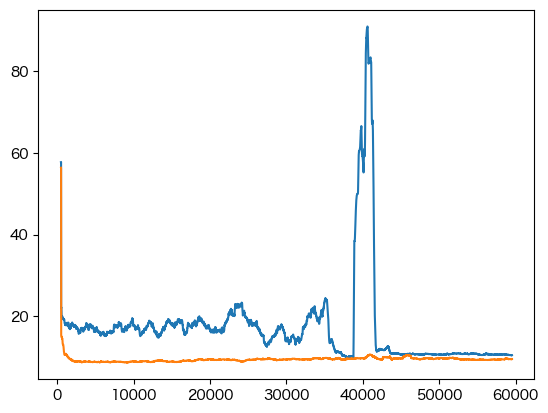

In [6]:
for f in df["filename"].unique():
    tdf = df[df["filename"] == f]
    x = tdf["Emg_cnt"].rolling(1000, center=True).std()
    plt.plot(x)
    

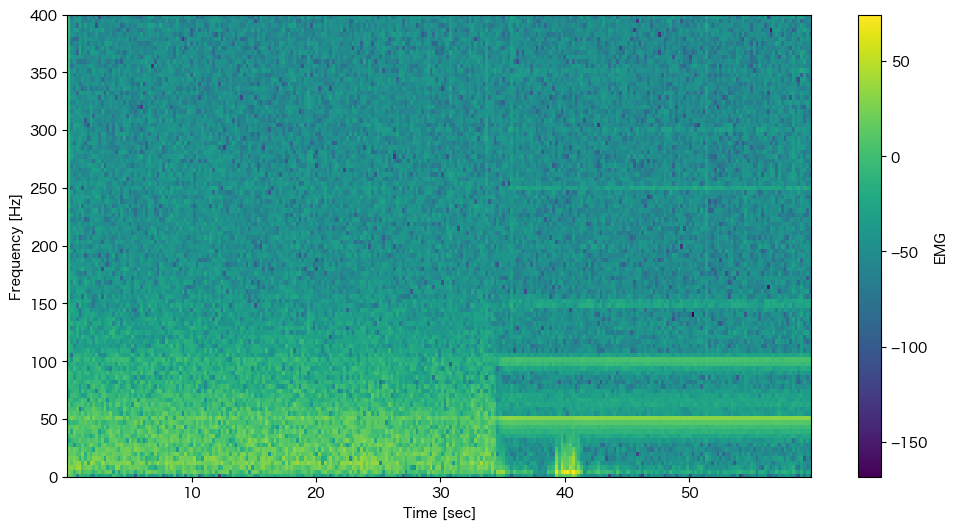

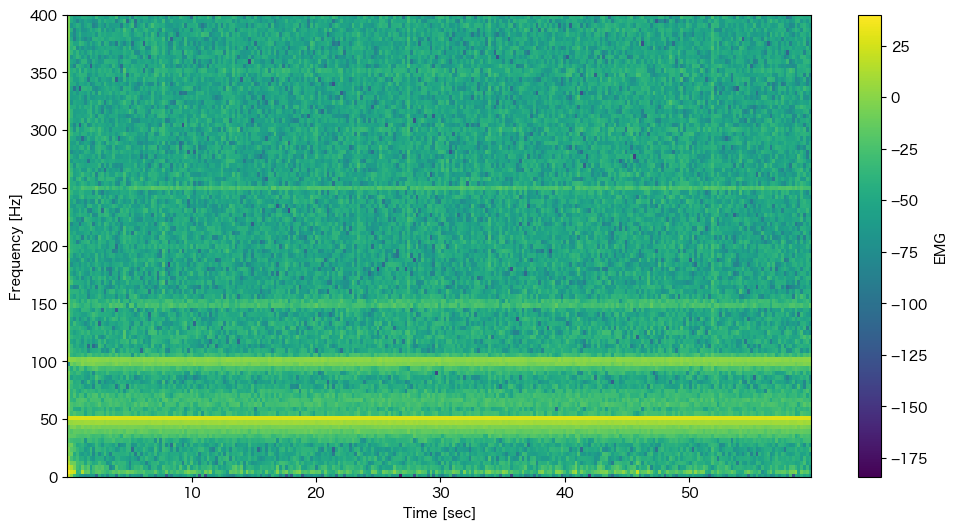

In [7]:
for f in df["filename"].unique():
    tdf = df[df["filename"] == f]
    x = tdf["Emg_cnt"]
    fs = 1000
    f, t, Sxx = signal.spectrogram(x, fs)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, 10*np.log(Sxx)) #intensityを修正
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0, 400)
    cbar = plt.colorbar() #カラーバー表示のため追加
    cbar.ax.set_ylabel("EMG") #カラーバーの名称表示のため追加
    plt.show()